#1.패키지 호출

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/source

/content/drive/MyDrive/Colab Notebooks/source


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import cv2

%matplotlib inline

#2. 카메라 조정

In [4]:
import os
from cameracalibration import CameraCalibrator
from google.colab.patches import cv2_imshow

# CameraCalibrator 객체 생성
calibrator = CameraCalibrator(nx=9, ny=6)

# 보정에 사용할 이미지 경로
images_folder_path = '/content/drive/MyDrive/Colab Notebooks/source/images_for_calibration/*.jpg'

# 이미지 보정
calibrator.calibrate(images_folder_path)

# 보정 결과 출력
for i, img_success in enumerate(calibrator.calibration_images_success):
    print('Calibration Success ' + str(i+1))
    cv2_imshow(img_success)
    cv2.waitKey(0)  

for i, img_error in enumerate(calibrator.calibration_images_error):
    print('Calibration Error ' + str(i+1))
    cv2_imshow(img_error)
    cv2.waitKey(0)

cv2.destroyAllWindows()




Output hidden; open in https://colab.research.google.com to view.

#3. 사물 가장자리 추출

Original


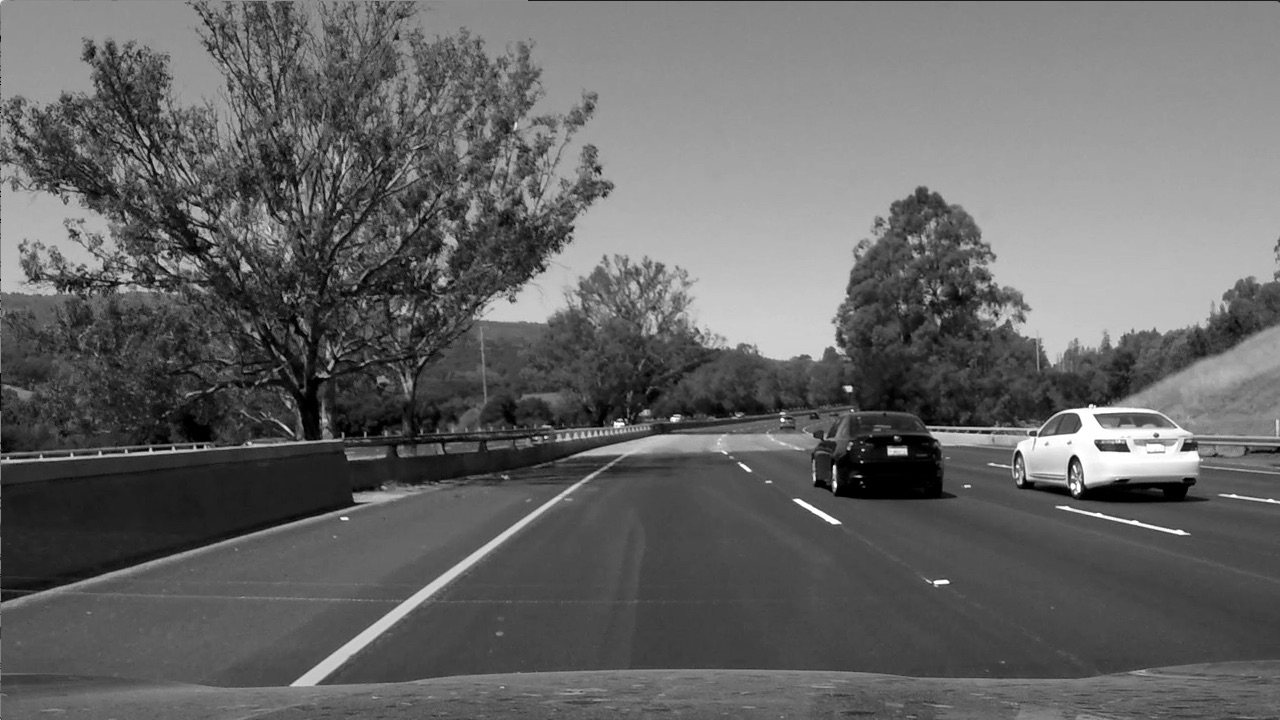

Edges


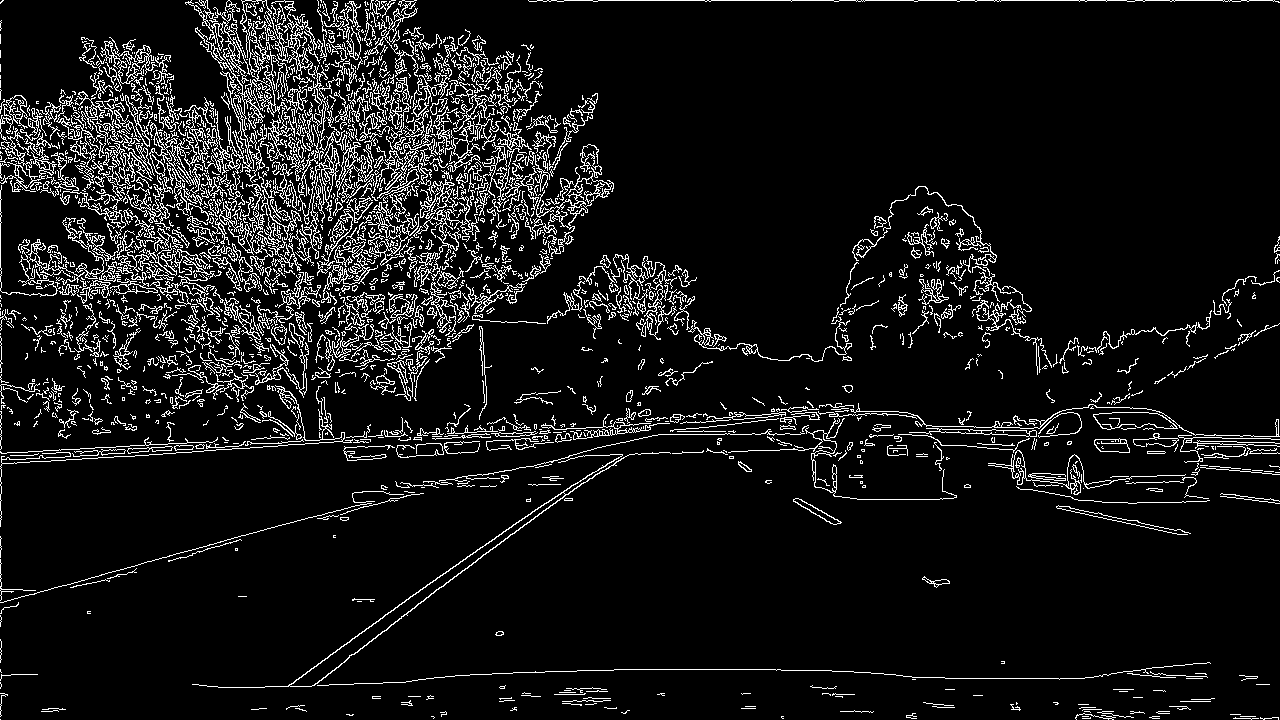

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow


# 원본 이미지 리딩, 가장자리 추출 속도를 위해 RGB 제거한 그레이스케일 적용
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/source/straight_lines.jpg', cv.IMREAD_GRAYSCALE)

# Canny 함수를 이용하여 가장자리 이미지를 생성
edges = cv.Canny(img, 100, 200)

# 원본 이미지와 가장자리 이미지를 출력
print('Original')
cv2_imshow(img)
print('Edges')
cv2_imshow(edges)

#4. 카메라 시점 변경(상단)

birdview image


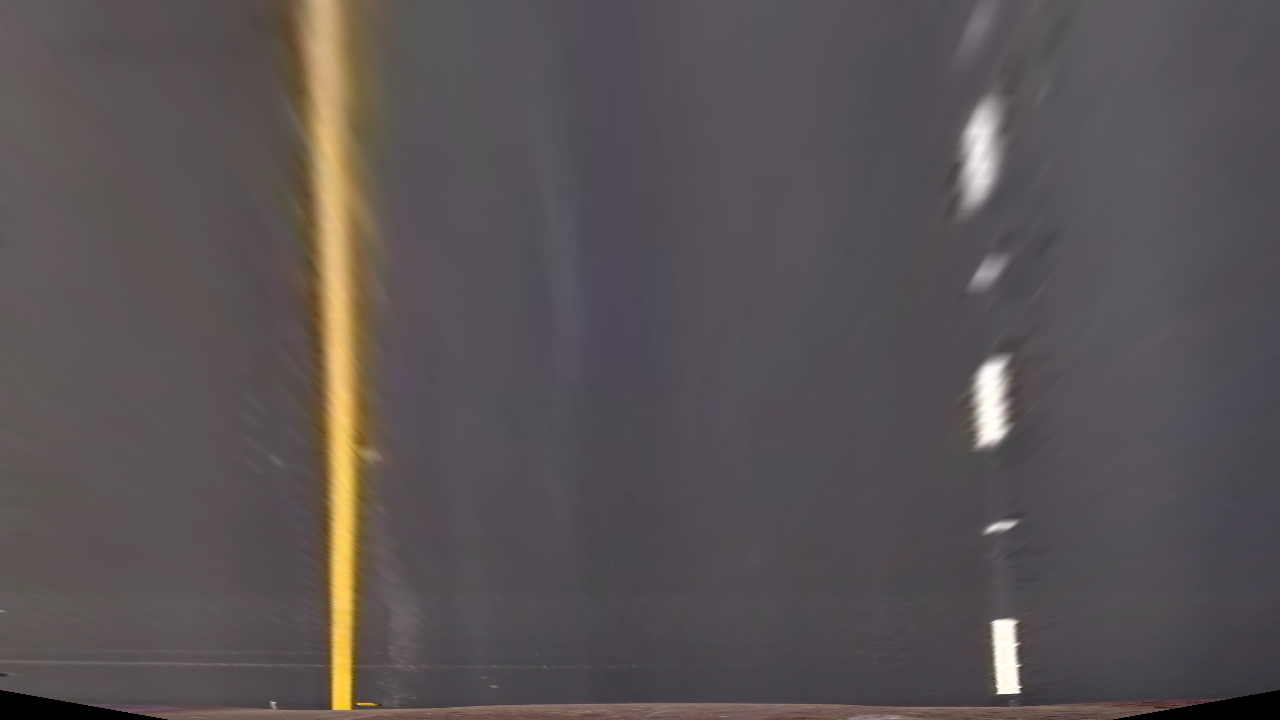

original


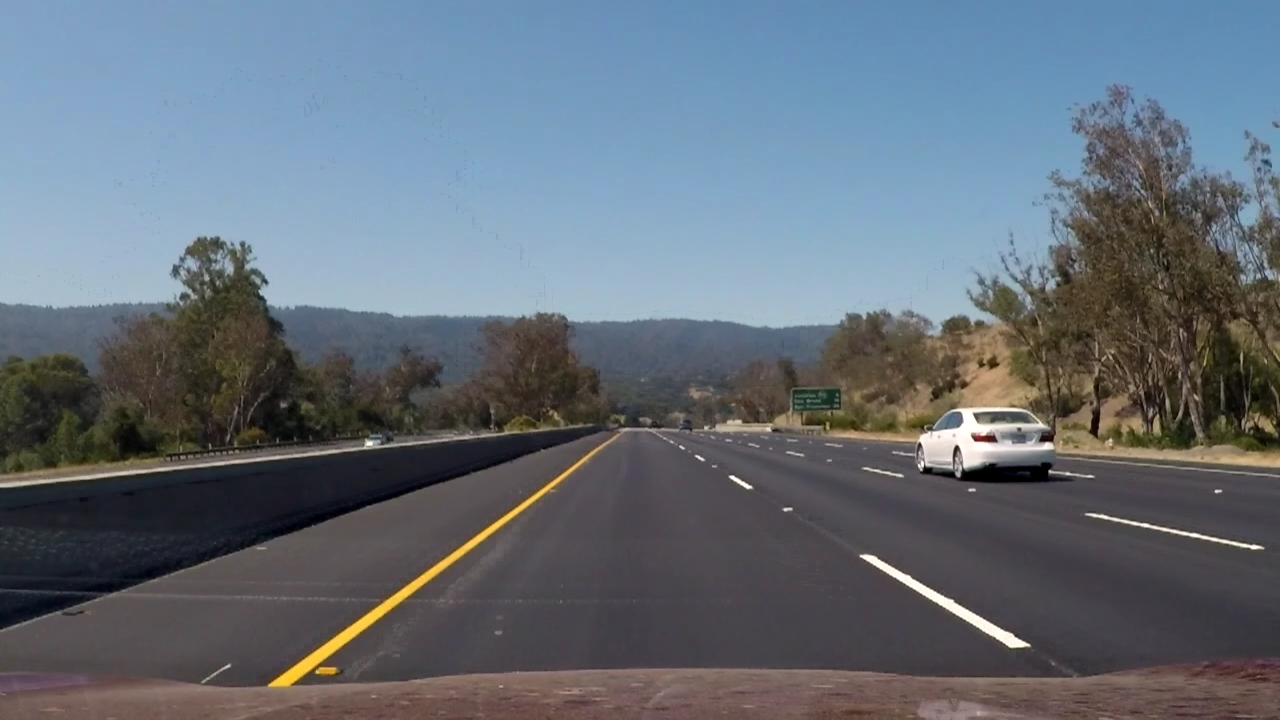

In [8]:
import perspective
import cv2 as cv
from google.colab.patches import cv2_imshow

#이미지 로딩
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/source/_birdview.JPG')

birdview_img = perspective.flatten_perspective(img)

print('birdview image')
cv2_imshow(birdview_img) 

print('original')
cv2_imshow(img)

#5. 차로영역 추출

In [31]:
import cv2
import numpy as np
import glob
import os
from google.colab.patches import cv2_imshow
from window import Window
from tracker import LaneTracker

# 이미지 로드
img_paths = glob.glob("/content/drive/MyDrive/Colab Notebooks/source/images_for_test_original/*.JPG")
save_path = "/content/drive/MyDrive/Colab Notebooks/source/images_for_test"

# 슬라이딩 윈도우 설정
window_height = 80
window_width = 30
n_windows = 10

# 이미지 처리
for i, img_path in enumerate(img_paths):
    # 이미지 로딩
    img = cv2.imread(img_path)

    # LaneTracker 초기화
    tracker = LaneTracker(img, n_windows=n_windows)

    # 윈도우 초기화
    window = Window(y1=img.shape[0], y2=img.shape[0]-window_height, x=img.shape[1]/2, m=window_width)

    # 차선 검출
    tracker.scan_frame_with_windows(img, [window])

    # 정보 표시
    img_with_info = tracker.process(img)

    # 변환된 이미지 저장
    cv2.imwrite(os.path.join(save_path, f"{i+1}.jpg"), img_with_info)

    # 변환된 이미지 출력
    cv2_imshow(img_with_info)
    cv2.waitKey(0)

    

Output hidden; open in https://colab.research.google.com to view.